## Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import all the data 

In [2]:
df = pd.read_csv('pp-complete.csv', parse_dates = [2], 
                 names = ['ID','price','date','code',
                            'property type','old/new','duration',
                           'address1','address2','address3','town/city','district','borough',
                           'region','PPDCategoryType','RecordStatus'])

In [3]:
df.head()

,ID,price,date,code,property type,old/new,duration,address1,address2,address3,town/city,district,borough,region,PPDCategoryType,RecordStatus
0,{A42E2F04-2538-4A25-94C5-49E29C6C8FA8},18500,1995-01-31,TQ1 1RY,F,N,L,VILLA PARADISO,FLAT 10,HIGHER WARBERRY ROAD,TORQUAY,TORQUAY,TORBAY,TORBAY,A,A
1,{1BA349E3-2579-40D6-999E-49E2A25D2284},73450,1995-10-09,L26 7XJ,D,Y,F,6,NaN,CATKIN ROAD,LIVERPOOL,LIVERPOOL,KNOWSLEY,MERSEYSIDE,A,A
2,{E5B50DCB-BC7A-4E54-B167-49E2A6B4148B},59000,1995-03-31,BH12 2AE,D,N,F,28,NaN,ALDER ROAD,POOLE,POOLE,POOLE,POOLE,A,A
3,{81E50116-D675-4B7F-9F8D-49E2B5D43271},31000,1995-12-04,IP13 0DR,D,Y,F,NONSUCH COTTAGE,NaN,THE STREET,HACHESTON,WOODBRIDGE,SUFFOLK COASTAL,SUFFOLK,A,A
4,{B97455B9-75CB-40BB-A615-42C53683E143},95000,1995-09-22,WS14 0BE,D,N,F,FOX COVER COTTAGE,NaN,HALL LANE,LICHFIELD,LICHFIELD,LICHFIELD,STAFFORDSHIRE,A,A


In [4]:
# check the total size of the data - there are 25,744,780 transactions 

In [5]:
len(df)

25744780

In [6]:
# But how many are duplicates?

In [7]:
left_df = len(df.drop_duplicates(subset=['price','date','code',
                            'property type','old/new','duration',
                           'address1','address2','address3','town/city','district','borough',
                           'region','PPDCategoryType','RecordStatus']))

In [8]:
# it turns out that < 0.05% are duplicates
(len(df)-left_df)/len(df)

0.0004920997576984539

In [9]:
# drop the duplicates
df2 = df.drop_duplicates(subset=['price','date','code',
                            'property type','old/new','duration',
                           'address1','address2','address3','town/city','district','borough',
                           'region','PPDCategoryType','RecordStatus'])

In [10]:
# reduce the data by removing extreme houses prices
# less than 10,000,000 and greater than 10,000
# there are 25,518,896 transactions 
dfuk = df2.loc[(df['price'] < 10000000) & (df['price'] > 10000), ]
len(dfuk)

25664269

## Histogram distribution 

(0.0, 600000.0)

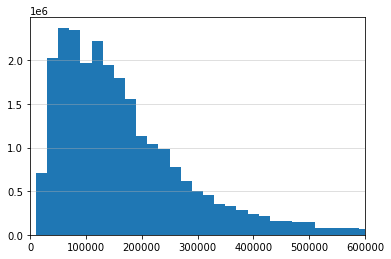

In [12]:
plt.hist(dfuk['price'],bins=500)
plt.grid(axis='y',alpha=0.5)
plt.xlim(0,600000)
# doesn't make sense as this is all the years' data

In [13]:
# add year column to the dataframe
dfuk.loc[:,'year'] = dfuk['date'].dt.year

/Users/smilynnzhang/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/smilynnzhang/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [14]:
dfuk.head()

,ID,price,date,code,property type,old/new,duration,address1,address2,address3,town/city,district,borough,region,PPDCategoryType,RecordStatus,year
0,{A42E2F04-2538-4A25-94C5-49E29C6C8FA8},18500,1995-01-31,TQ1 1RY,F,N,L,VILLA PARADISO,FLAT 10,HIGHER WARBERRY ROAD,TORQUAY,TORQUAY,TORBAY,TORBAY,A,A,1995
1,{1BA349E3-2579-40D6-999E-49E2A25D2284},73450,1995-10-09,L26 7XJ,D,Y,F,6,NaN,CATKIN ROAD,LIVERPOOL,LIVERPOOL,KNOWSLEY,MERSEYSIDE,A,A,1995
2,{E5B50DCB-BC7A-4E54-B167-49E2A6B4148B},59000,1995-03-31,BH12 2AE,D,N,F,28,NaN,ALDER ROAD,POOLE,POOLE,POOLE,POOLE,A,A,1995
3,{81E50116-D675-4B7F-9F8D-49E2B5D43271},31000,1995-12-04,IP13 0DR,D,Y,F,NONSUCH COTTAGE,NaN,THE STREET,HACHESTON,WOODBRIDGE,SUFFOLK COASTAL,SUFFOLK,A,A,1995
4,{B97455B9-75CB-40BB-A615-42C53683E143},95000,1995-09-22,WS14 0BE,D,N,F,FOX COVER COTTAGE,NaN,HALL LANE,LICHFIELD,LICHFIELD,LICHFIELD,STAFFORDSHIRE,A,A,1995


##  Plot the graph showing the average sold house prices in UK from 1995 - 2020 

Text(0, 0.5, 'Average Price(£)')

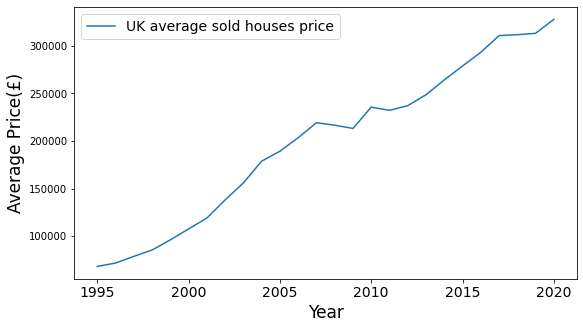

In [15]:
font_size = 17
plt.figure(figsize = (9,5))

# plot the graph
dfuk.groupby('year').price.mean().plot(label='UK average sold houses price')
plt.legend(fontsize = font_size - 3);
plt.xticks(size = font_size - 3)
plt.xlabel('Year', size = font_size)
plt.ylabel('Average Price(£)', size = font_size)

In [16]:
# check the region name and how many are there? 
dfuk.region.unique()

array(['TORBAY', 'MERSEYSIDE', 'POOLE', 'SUFFOLK', 'STAFFORDSHIRE',
       'DERBYSHIRE', 'SURREY', 'WEST MIDLANDS', 'WEST YORKSHIRE',
       'NORFOLK', 'NORTHAMPTONSHIRE', 'SHROPSHIRE', 'CHESHIRE',
       'BOURNEMOUTH', 'GREATER LONDON', 'GREATER MANCHESTER',
       'NOTTINGHAMSHIRE', 'LINCOLNSHIRE', 'MID GLAMORGAN', 'THAMESDOWN',
       'HALTON', 'MILTON KEYNES', 'CAMBRIDGESHIRE', 'LANCASHIRE', 'KENT',
       'SOMERSET', 'WILTSHIRE', 'CLWYD', 'SOUTH YORKSHIRE',
       'SOUTHEND-ON-SEA', 'WARWICKSHIRE', 'HERTFORDSHIRE', 'LEICESTER',
       'WEST SUSSEX', 'DEVON', 'HAMPSHIRE', 'BRIGHTON AND HOVE',
       'BEDFORDSHIRE', 'EAST SUSSEX', 'OXFORDSHIRE', 'BUCKINGHAMSHIRE',
       'READING', 'TYNE AND WEAR', 'LEICESTERSHIRE',
       'WINDSOR AND MAIDENHEAD', 'ESSEX', 'AVON', 'NEWPORT', 'CARDIFF',
       'DURHAM', 'THURROCK', 'STOCKTON-ON-TEES', 'CUMBRIA',
       'NORTH YORKSHIRE', 'SLOUGH', 'BRACKNELL FOREST', 'SOUTH GLAMORGAN',
       'CORNWALL', 'HUMBERSIDE', 'WARRINGTON', 'BERKSHIRE',
    

In [17]:
print(len(dfuk.region.unique()))
# there are 128 regions in the data - is it true? 

128


In [18]:
dfuk.borough.unique()

array(['TORBAY', 'KNOWSLEY', 'POOLE', 'SUFFOLK COASTAL', 'LICHFIELD',
       'NORTH EAST DERBYSHIRE', 'EPSOM AND EWELL', 'WALSALL', 'ELMBRIDGE',
       'WAKEFIELD', 'BRECKLAND', 'SOUTH NORTHAMPTONSHIRE', 'THE WREKIN',
       'CONGLETON', 'BOURNEMOUTH', 'SUTTON', 'BRADFORD', 'TAMESIDE',
       'ASHFIELD', 'KIRKLEES', 'SOUTH KESTEVEN', 'TAFF-ELY', 'THAMESDOWN',
       'HALTON', 'MILTON KEYNES', 'SOUTH CAMBRIDGESHIRE', 'PRESTON',
       'SOUTH RIBBLE', 'MAIDSTONE', 'WYRE', 'TAUNTON DEANE',
       'NORTH WILTSHIRE', 'WREXHAM MAELOR', 'DONCASTER', 'GEDLING',
       'WEST WILTSHIRE', 'HARROW', 'SOUTHEND-ON-SEA', 'TUNBRIDGE WELLS',
       'NUNEATON AND BEDWORTH', 'ST ALBANS', 'LEICESTER', 'HAVERING',
       'WARWICK', 'DARTFORD', 'WORTHING', 'LEWISHAM',
       'NEWARK AND SHERWOOD', 'CREWE AND NANTWICH', 'LEEDS', 'PLYMOUTH',
       'BIRMINGHAM', 'NEW FOREST', 'BRIGHTON AND HOVE',
       'ROCHESTER UPON MEDWAY', 'BROXTOWE', 'MID DEVON', 'SHEFFIELD',
       'HARINGEY', 'NORTH BEDFORDSHIRE', 'PE

In [19]:
dfuk.district.unique()

array(['TORQUAY', 'LIVERPOOL', 'POOLE', ..., 'BILLINGHURST', 'GATWICK',
       'BIGGAR'], dtype=object)

## Compare UK pricing with London pricing 

In [20]:
# So first I obtain the London dataframe

In [21]:
#only london
dflondon = dfuk[dfuk['region'] == 'GREATER LONDON']

In [22]:
dflondon.head()

,ID,price,date,code,property type,old/new,duration,address1,address2,address3,town/city,district,borough,region,PPDCategoryType,RecordStatus,year
15,{A4315312-90D5-42D1-85F6-3F3209E9C709},59995,1995-10-19,SM6 7AG,F,Y,L,55,NaN,CARAWAY PLACE,WALLINGTON,WALLINGTON,SUTTON,GREATER LONDON,A,A,1995
36,{CEA5DDF7-F936-4DB1-934B-42C5CBF28AD8},292500,1995-08-31,HA3 6DD,D,Y,F,11,NaN,LAVENDER GARDENS,HARROW WEALD,HARROW,HARROW,GREATER LONDON,A,A,1995
43,{613A5A52-B86D-4F69-B56D-49E35D0A3C64},84000,1995-07-28,RM5 3YL,T,N,F,40,NaN,MOUNT PLEASANT ROAD,ROMFORD,ROMFORD,HAVERING,GREATER LONDON,A,A,1995
47,{7624595C-53BF-4AC8-9683-42C5F7CFA5C6},66500,1995-07-12,SE6 4EW,T,N,F,6,NaN,BROXTED ROAD,LONDON,LONDON,LEWISHAM,GREATER LONDON,A,A,1995
62,{A5053A3C-81C1-4CD1-8DEF-49E3C462498A},67995,1995-09-20,N22 6NP,T,N,F,155,NaN,MORLEY AVENUE,LONDON,LONDON,HARINGEY,GREATER LONDON,A,A,1995


In [23]:
# How many unique boroughs - It turns out to be 33. And there are 33 boroughs in London. So that should be correct. 
len(dflondon.borough.unique())

33

In [24]:
dflondon.borough.unique()

array(['SUTTON', 'HARROW', 'HAVERING', 'LEWISHAM', 'HARINGEY', 'BROMLEY',
       'CROYDON', 'BARNET', 'WANDSWORTH', 'ISLINGTON', 'LAMBETH',
       'CITY OF WESTMINSTER', 'HILLINGDON', 'HAMMERSMITH AND FULHAM',
       'HACKNEY', 'KENSINGTON AND CHELSEA', 'TOWER HAMLETS',
       'RICHMOND UPON THAMES', 'REDBRIDGE', 'MERTON', 'ENFIELD',
       'SOUTHWARK', 'GREENWICH', 'HOUNSLOW', 'EALING',
       'KINGSTON UPON THAMES', 'BEXLEY', 'BRENT', 'WALTHAM FOREST',
       'CAMDEN', 'BARKING AND DAGENHAM', 'NEWHAM', 'CITY OF LONDON'],
      dtype=object)

In [25]:
# how many districts
len(dflondon.district.unique())

95

In [26]:
dflondon.district.unique()

array(['WALLINGTON', 'HARROW', 'ROMFORD', 'LONDON', 'BECKENHAM',
       'UXBRIDGE', 'CARSHALTON', 'SUTTON', 'TWICKENHAM', 'ILFORD',
       'HAYES', 'TEDDINGTON', 'EDGWARE', 'HOUNSLOW', 'BROMLEY',
       'SURBITON', 'CROYDON', 'BEXLEYHEATH', 'RAINHAM', 'WEMBLEY',
       'PINNER', 'KINGSTON UPON THAMES', 'WELLING', 'SIDCUP', 'COULSDON',
       'SOUTH CROYDON', 'ISLEWORTH', 'CHESSINGTON', 'GREENFORD',
       'NEW MALDEN', 'ENFIELD', 'RICHMOND', 'WOODFORD GREEN', 'HAMPTON',
       'ORPINGTON', 'FELTHAM', 'BARNET', 'BRENTFORD', 'ERITH',
       'THORNTON HEATH', 'HORNCHURCH', 'KENLEY', 'BEXLEY',
       'WORCESTER PARK', 'DAGENHAM', 'BARKING', 'NORTHWOOD', 'MORDEN',
       'WEST DRAYTON', 'UPMINSTER', 'RUISLIP', 'SOUTHALL', 'PURLEY',
       'CHISLEHURST', 'NORTHOLT', 'MITCHAM', 'WEST WICKHAM', 'ASHFORD',
       'WESTERHAM', 'KESTON', 'CHIGWELL', 'STANMORE', 'BELVEDERE',
       'SEVENOAKS', 'DARTFORD', 'WHYTELEAFE', 'WARLINGHAM',
       'BUCKHURST HILL', 'EAST MOLESEY', 'BANSTEAD', 'WALTHAM CR

Text(0, 0.5, 'Average Price(£)')

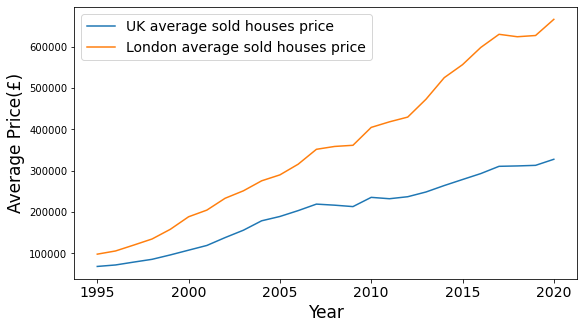

In [27]:
# I would like to plot the UK pricing with London pricing in one graph

plt.figure(figsize = (9,5))

# plot the graph
dfuk.groupby('year').price.mean().plot(label='UK average sold houses price')
dflondon.groupby('year').price.mean().plot(label='London average sold houses price')
plt.legend(fontsize = font_size - 3);
plt.xticks(size = font_size - 3)
plt.xlabel('Year', size = font_size)
plt.ylabel('Average Price(£)', size = font_size)

In [28]:
# From the graph, you can see, London increases more rapidly then UK in general, especially between 2010 and 2017
# London's pricing still increase higher than UK in general in between 2019 to 2020
# covid does not affect that much the average sold house prices in 2020

## What are the top 10 expensive regions in UK?

In [29]:
dfuk.groupby(['region','year']).price.mean().to_frame()

price
region                       year               
AVON                         1995   65001.241908
                             1996   61132.495090
                             2009  172500.000000
BATH AND NORTH EAST SOMERSET 1995   90562.692308
                             1996   83368.850714
...                                          ...
YORK                         2016  268427.972097
                             2017  280668.349431
                             2018  292737.874431
                             2019  307319.377343
                             2020  297212.407743

[3015 rows x 1 columns]

In [30]:
# average price during 1995 to 2020 
# the most expensive TOP 10 regions in UK
uktop10 = dfuk.groupby(['region']).price.mean().sort_values(ascending = False).to_frame().head(10)
uktop10

,price
region,
WINDSOR AND MAIDENHEAD,361883.829478
"BOURNEMOUTH, CHRISTCHURCH AND POOLE",351013.649026
GREATER LONDON,336300.099062
SURREY,331476.332967
BUCKINGHAMSHIRE,299760.734915
WOKINGHAM,286211.561038
WEST BERKSHIRE,283631.979623
CENTRAL BEDFORDSHIRE,282106.573840
ISLES OF SCILLY,277415.130053


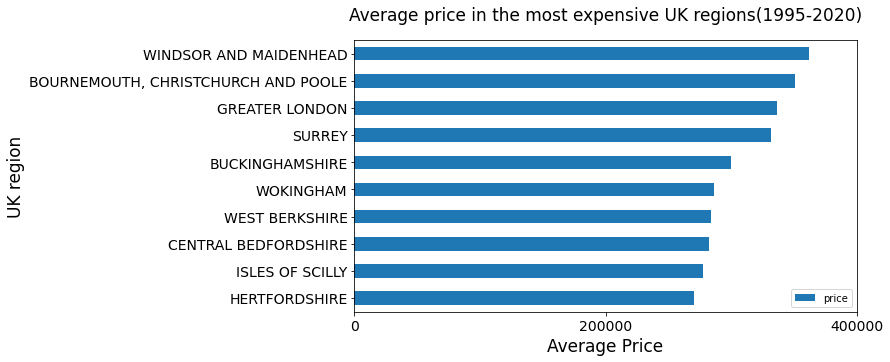

In [31]:
uktop10.sort_values(by = 'price', ascending = True).plot(kind = 'barh', figsize = (9,5))
plt.title('Average price in the most expensive UK regions(1995-2020)', size = font_size, y = 1.05)
plt.ylabel('UK region', size = font_size)
plt.yticks(size = font_size - 3)
plt.xlabel('Average Price', size = font_size)
plt.xticks([0, 200_000, 400_000], size = font_size - 3);

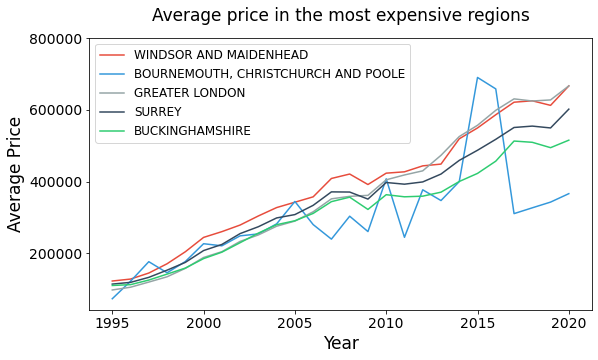

In [32]:
# surprisingly, the Greater London is not the top 1. I predict maybe the reason being there are bigger houses in other regions than London.
# for future analysis ideas, it would be good to have more info on the houses bed numbers, size, etc. 

# We focus on the 5 most expensive regions and see the evolution of the average price through time from 1995 to 2020
top5_indeces = uktop10.head().index
colors = ['#e74c3c', '#3498db', '#95a5a6', '#34495e', '#2ecc71']

plt.figure(figsize = (9, 5))
for index, i in enumerate(top5_indeces):
    df_ = dfuk[dfuk['region'] == i].groupby('year').price.mean().plot(y='average_price',label=i, color =colors[index])
plt.title('Average price in the most expensive regions', y = 1.04, size = font_size)
plt.xlabel('Year', size = font_size)
plt.xticks(size = font_size - 3)
plt.ylabel('Average Price', size = font_size)
plt.yticks([0.2*1E+6, 0.4*1E+6, 0.6*1E+6, 0.8*1E+6], size = font_size - 3)
plt.legend(fontsize = font_size - 5);

## What are the most expensive boroughs in London?

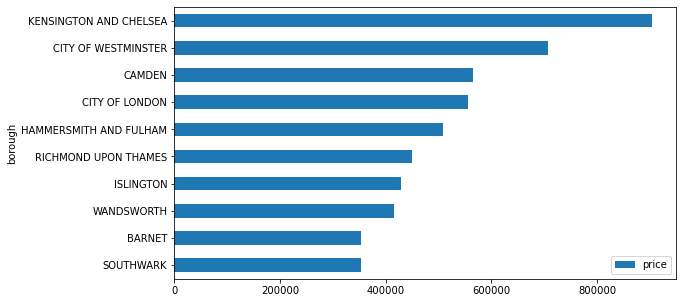

In [33]:
uklondontop10 = dflondon.groupby('borough').price.mean().sort_values(ascending = False).to_frame().head(10)
uklondontop10.sort_values(by = 'price', ascending = True).plot(kind = 'barh', figsize = (9,5))

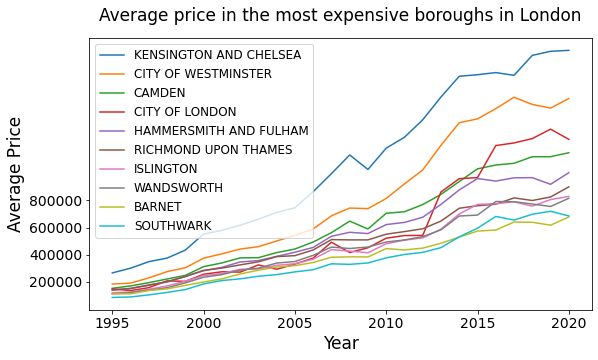

In [34]:
top10_indeces = uklondontop10.index

plt.figure(figsize = (9, 5))
for index, i in enumerate(top10_indeces):
    df_ = dflondon[dflondon['borough'] == i].groupby('year').price.mean().plot(y='average_price',label=i)
plt.title('Average price in the most expensive boroughs in London', y = 1.04, size = font_size)
plt.xlabel('Year', size = font_size)
plt.xticks(size = font_size - 3)
plt.ylabel('Average Price', size = font_size)
plt.yticks([0.2*1E+6, 0.4*1E+6, 0.6*1E+6, 0.8*1E+6], size = font_size - 3)
plt.legend(fontsize = font_size - 5);
# City of London jumps higher from 2012
# we can see that in 2020 the price in 

## District comparison

In [50]:
# Comparison of districts that I am interested in FROM 2006 TO 2020

districts = ['HAYES','WEST DRAYTON','ISLEWORTH', 'TWICKENHAM']

dfstaines = dfuk[dfuk['district'] == 'STAINES-UPON-THAMES']

Text(0, 0.5, 'Average sold price')

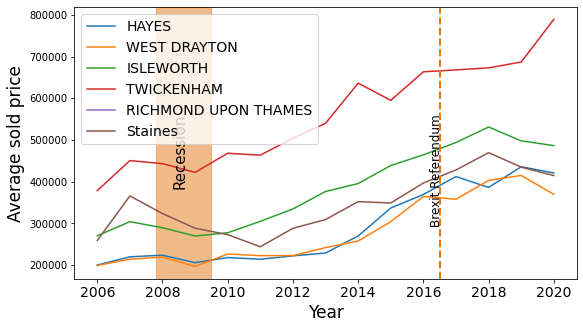

In [49]:
plt.figure(figsize = (9,5))

for i in range(len(districts)):
    dflondon[dflondon['district'] == districts[i]].groupby('year').price.mean().loc[2006:2020].plot(label=districts[i])
dfstaines.groupby('year').price.mean().loc[2006:2020].plot(label='Staines')
    
plt.axvspan(2007.8, 2009.5, alpha = 0.5, color = '#E57715')
plt.text(x = 2008.3, y = 390000, s = 'Recession', rotation = 90, fontsize = font_size-2)
plt.axvline(x = 2016.5, lw = 2, color = '#E57715', linestyle = '--')
plt.text(x = 2016.2, y = 300000, s = 'Brexit Referendum', rotation = 90, fontsize = font_size-5)

plt.legend(fontsize = font_size - 3);
plt.xticks(size = font_size - 3)
plt.xlabel('Year', size = font_size)
plt.ylabel('Average sold price', size = font_size)

Text(0, 0.5, 'Houses sold qty')

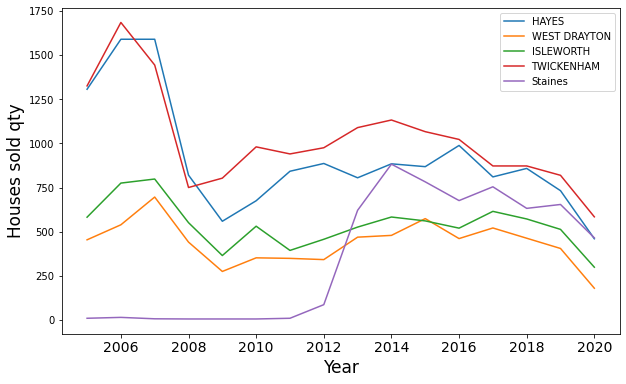

In [43]:
#District Comparison in sold house quantity 
plt.figure(figsize = (10,6))

for i in range(len(districts)):
    dflondon[dflondon['district'] == districts[i]].groupby('year').price.count().loc[2005:2020].plot(label=districts[i])
dfstaines.groupby('year').price.count().loc[2005:2020].plot(label='Staines')
    
#plt.axvspan(2007.8, 2009.5, alpha = 0.5, color = '#E57715')
#plt.text(x = 2008.3, y = 390000, s = 'Recession', rotation = 90, fontsize = font_size-2)
#plt.axvline(x = 2016.5, lw = 2, color = '#E57715', linestyle = '--')
#plt.text(x = 2016.2, y = 300000, s = 'Brexit Referendum', rotation = 90, fontsize = font_size-5)

plt.legend(fontsize = font_size - 3);
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.legend(loc='upper right')

plt.xticks(size = font_size - 3)
plt.xlabel('Year', size = font_size)
plt.ylabel('Houses sold qty', size = font_size)